In [2]:
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('../../data/mnist', one_hot=False)

Extracting ../../data/mnist\train-images-idx3-ubyte.gz
Extracting ../../data/mnist\train-labels-idx1-ubyte.gz
Extracting ../../data/mnist\t10k-images-idx3-ubyte.gz
Extracting ../../data/mnist\t10k-labels-idx1-ubyte.gz


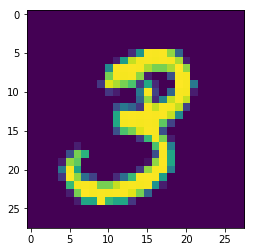

In [4]:
img = mnist.train.images[1]
plt.imshow(img.reshape(28, 28))

In [5]:
hidden_units = 64
input_units = mnist.train.images.shape[1]

In [6]:
# 输入层
inputs_ = tf.placeholder(tf.float32, (None, input_units), name='inputs_')
targets_ = tf.placeholder(tf.float32, (None, input_units), name='targets_')

In [7]:
# 隐层
hidden_ = tf.layers.dense(inputs_, hidden_units, activation=tf.nn.relu)

In [8]:
# 输出层
logits_ = tf.layers.dense(hidden_, input_units, activation=None)
outputs_ = tf.sigmoid(logits_, name='outputs_')

In [9]:
# 损失函数
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits_)
cost = tf.reduce_mean(loss)

learn_rate = 0.01
optmizer = tf.train.AdamOptimizer(learn_rate).minimize(loss)

Epoch 1/5, iterator 50 Training loss: 0.1685
Epoch 2/5, iterator 50 Training loss: 0.0886
Epoch 3/5, iterator 50 Training loss: 0.0872
Epoch 4/5, iterator 50 Training loss: 0.0849
Epoch 5/5, iterator 50 Training loss: 0.0832


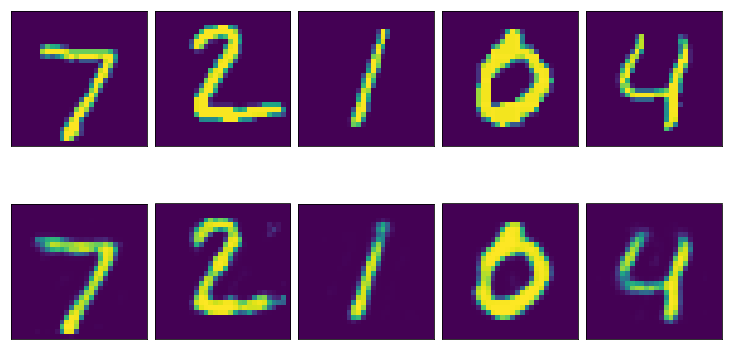

In [10]:
# 训练
epochs = 5
batch_size = 128
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for e in range(epochs):
        for idx in range(mnist.train.num_examples // batch_size):
            batch = mnist.train.next_batch(batch_size)
            batch_cost, _ = sess.run([cost, optmizer],
                                     feed_dict={inputs_: batch[0],
                                                targets_: batch[0]})
            if idx / 50 == 1:
                print('Epoch {}/{}, iterator {}'.format(e+1, epochs, idx),
                      'Training loss: {:.4f}'.format(batch_cost))
            
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(10,6))
    test_imgs = mnist.test.images[:5]
    reconstructed, compressed = sess.run([outputs_, hidden_], feed_dict={inputs_: test_imgs})
    for image, row in zip([test_imgs, reconstructed], axes):
        for img, ax in zip(image, row):
            ax.imshow(img.reshape((28, 28)))
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    
    fig.tight_layout(pad=0.1)